In [66]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
import numpy as np

In [67]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Pull data from Looker:

In [68]:
import json
import requests
import configparser


#Read config file with Looker API and Database connection information
config = configparser.ConfigParser(allow_no_value=True)
config.read('config')

#Very Basic Looker API class allowing us to access the data from a given Look ID
class lookerAPIClient:
    def __init__(self, api_host=None, api_client_id=None, api_secret=None, api_port='19999'):
        auth_request_payload = {'client_id': api_client_id, 'client_secret': api_secret}
        self.host = api_host
        self.uri_stub = '/api/3.0/'
        self.uri_full = ''.join([api_host, ':', api_port, self.uri_stub])
        response = requests.post(self.uri_full + 'login', params=auth_request_payload)
        authData = response.json()
        self.access_token = authData['access_token']
        self.auth_headers = {
                'Authorization' : 'token ' + self.access_token,
                }

    def post(self, call='', json_payload=None):
        response = requests.post(self.uri_full + call, headers=self.auth_headers, json=json_payload)
        return response.json()

    def get(self, call=''):
        response = requests.get(self.uri_full + call, headers=self.auth_headers)
        return json.loads(response.content) #response.json()

    def runLook(self, look, limit):
        optional_arguments = '?' + 'limit=' + str(limit)
        return self.get('/'.join(['looks',look,'run','json'])+optional_arguments)

In [69]:
#Initialize the Looker API Class with the data in our config file (which is stored in a neighboring file 'config')
x = lookerAPIClient(
        api_host      = config.get('api', 'api_host'), 
        api_client_id = config.get('api', 'api_client_id'), 
        api_secret    = config.get('api', 'api_secret'), 
        api_port      = config.get('api', 'api_port')
        )   

In [70]:
# Use the API to get data from the Look 
orders = x.runLook(look='1760', limit=1000000)

In [71]:
df = pd.DataFrame(orders)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125060 entries, 0 to 125059
Data columns (total 15 columns):
orders.days_between_last_order_and_today              125060 non-null int64
user_order_days.days_ordered_pc_gc_in_first_year      123241 non-null float64
user_order_days.months_ordered_pc_gc_in_first_year    123241 non-null float64
user_order_days.weeks_ordered_pc_gc_in_first_year     123241 non-null float64
user_order_facts.days_between_first_and_last_order    125060 non-null int64
user_order_facts.first_order_month                    125060 non-null object
user_order_facts.orders_within_month_1                125060 non-null int64
user_order_facts.orders_within_month_2                125060 non-null int64
user_order_facts.orders_within_week_1                 125060 non-null int64
user_order_facts.orders_within_year_1                 125060 non-null int64
user_payment_facts.total_payments_by_month_1          125060 non-null float64
user_payment_facts.total_payments_by_month_1

In [73]:
df.head()

orders.days_between_last_order_and_today  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   user_order_days.days_ordered_pc_gc_in_first_year  \
0                                               7.0   
1                                              28.0   
2                                               9.0   
3                                              11.0   
4                                              15.0   

   user_order_days.months_ordered_pc_gc_in_first_year  \
0                                                 3.0   
1                                                10.0   
2                                                 7.0   
3                                                 3.0   
4                                                 8.0   

   user_order_days.weeks_ordered_pc_gc_in_first_year  \
0                                                6.0   
1                                               23.0   
2                                                9.0   
3                                                8.0   
4                                               13.0   

   user_order_facts.days_between_first_and_last_order  \
0                                                 743   
1                                                 754   
2                                                 743   
3                                                 753   
4                                                 743   

  user_order_facts.first_order_month  user_order_facts.orders_within_month_1  \
0                            2016-10                                      12   
1                            2016-10                                       9   
2                            2016-10                                       5   
3                            2016-10                                      13   
4                            2016-10                                       8   

   user_order_facts.orders_within_month_2  \
0                                      12   
1                                      12   
2                                       6   
3                                      13   
4                                       8   

   user_order_facts.orders_within_week_1  \
0                                      2   
1                                      4   
2                                      1   
3                                      3   
4                                      2   

   user_order_facts.orders_within_year_1  \
0                                     19   
1                                     49   
2                                     11   
3                                     17   
4                                     24   

   user_payment_facts.total_payments_by_month_1  \
0                                         67.95   
1                                         26.91   
2                                         17.95   
3                                         67.95   
4                                          0.00   

   user_payment_facts.total_payments_by_month_12  \
0                                          67.95   
1                                         157.05   
2                                          35.90   
3                                          67.95   
4                                          34.95   

   user_payment_facts.total_payments_by_week_1  \
0                                        67.95   
1                                        11.96   
2                                        17.95   
3                                        67.95   
4                                         0.00   

  user_use_cases_facts.first_use_case  users.id  
0                                None  39733996  
1                                None  39731720  
2            

In [74]:
df.columns=['days_since_last_order', 'days_ordered_year1', 'months_ordered_year1', 'weeks_ordered_year1', 'days_between_first_and_last', 'first_order_month', 'orders_month_1', 'orders_month_2', 'orders_week_1', 'orders_year_1', 'payments_by_month_1', 'payments_by_month_12', 'payments_by_week_1', 'first_use_case', 'user_id']

In [75]:
df.head()

days_since_last_order  days_ordered_year1  months_ordered_year1  \
0                      0                 7.0                   3.0   
1                      0                28.0                  10.0   
2                      0                 9.0                   7.0   
3                      0                11.0                   3.0   
4                      0                15.0                   8.0   

   weeks_ordered_year1  days_between_first_and_last first_order_month  \
0                  6.0                          743           2016-10   
1                 23.0                          754           2016-10   
2                  9.0                          743           2016-10   
3                  8.0                          753           2016-10   
4                 13.0                          743           2016-10   

   orders_month_1  orders_month_2  orders_week_1  orders_year_1  \
0              12              12              2             19   
1               9              12              4             49   
2               5               6              1             11   
3              13              13              3             17   
4               8               8              2             24   

   payments_by_month_1  payments_by_month_12  payments_by_week_1  \
0                67.95                 67.95               67.95   
1                26.91                157.05               11.96   
2                17.95                 35.90               17.95   
3                67.95                 67.95               67.95   
4                 0.00                 34.95                0.00   

  first_use_case   user_id  
0           None  39733996  
1           None  39731720  
2           None  38576501  
3           None  39729428  
4           None  39546889

In [76]:
df['retained'] = df['days_since_last_order'].apply(lambda x: 1 if x <365 else 0)

In [77]:
df.drop('days_since_last_order', axis=1, inplace=True)

In [78]:
df.drop('days_between_first_and_last', axis=1, inplace=True)

In [79]:
df.head()

days_ordered_year1  months_ordered_year1  weeks_ordered_year1  \
0                 7.0                   3.0                  6.0   
1                28.0                  10.0                 23.0   
2                 9.0                   7.0                  9.0   
3                11.0                   3.0                  8.0   
4                15.0                   8.0                 13.0   

  first_order_month  orders_month_1  orders_month_2  orders_week_1  \
0           2016-10              12              12              2   
1           2016-10               9              12              4   
2           2016-10               5               6              1   
3           2016-10              13              13              3   
4           2016-10               8               8              2   

   orders_year_1  payments_by_month_1  payments_by_month_12  \
0             19                67.95                 67.95   
1             49                26.91                157.05   
2             11                17.95                 35.90   
3             17                67.95                 67.95   
4             24                 0.00                 34.95   

   payments_by_week_1 first_use_case   user_id  retained  
0               67.95           None  39733996         1  
1               11.96           None  39731720         1  
2               17.95           None  38576501         1  
3               67.95           None  39729428         1  
4                0.00           None  39546889         1

In [81]:
df.retained.value_counts()

1    81663
0    43397
Name: retained, dtype: int64

In [26]:
df = df.loc[pd.notnull(df['months_ordered_year1'])]

In [27]:
df['days_ordered_year1'] = df['days_ordered_year1'].astype(int)
df['months_ordered_year1'] = df['months_ordered_year1'].astype(int)
df['weeks_ordered_year1'] = df['weeks_ordered_year1'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123214 entries, 0 to 125032
Data columns (total 15 columns):
days_ordered_year1             123214 non-null int64
months_ordered_year1           123214 non-null int64
weeks_ordered_year1            123214 non-null int64
days_between_first_and_last    123214 non-null int64
first_order_month              123214 non-null object
orders_month_1                 123214 non-null int64
orders_month_2                 123214 non-null int64
orders_week_1                  123214 non-null int64
orders_year_1                  123214 non-null int64
payments_by_month_1            123214 non-null float64
payments_by_month_12           123214 non-null float64
payments_by_week_1             123214 non-null float64
first_use_case                 89908 non-null object
user_id                        123214 non-null int64
retained                       123214 non-null int64
dtypes: float64(3), int64(10), object(2)
memory usage: 15.0+ MB


In [28]:
df.head()

days_ordered_year1  months_ordered_year1  weeks_ordered_year1  \
0                   5                     2                    3   
1                  12                     7                   12   
2                   2                     1                    2   
3                   5                     2                    3   
4                   8                     5                    6   

   days_between_first_and_last first_order_month  orders_month_1  \
0                          746           2016-10               2   
1                          748           2016-10               2   
2                          740           2016-10               4   
3                          746           2016-10               7   
4                          739           2016-10               2   

   orders_month_2  orders_week_1  orders_year_1  payments_by_month_1  \
0               2              2              5               5.9800   
1               3              1             12               8.1517   
2               4              4              4               8.8570   
3               7              7              8              19.9000   
4               2              2             19              31.4500   

   payments_by_month_12  payments_by_week_1 first_use_case   user_id  retained  
0               24.9000              5.9800           None  39734570         1  
1               41.2094              8.1517           None  39733657         1  
2                8.8570              8.8570           None  39737642         1  
3               19.9000              9.9500           None  39653720         1  
4               56.4000              9.9500           None  39738032         1

In [32]:
df['first_order_month'] = df['first_order_month'].apply(lambda x: x[5:])

In [36]:
df['first_order_month_name'] = df['first_order_month'].apply(lambda x: 'January' if x =='01'
                                                        else 'February' if x=='02'
                                                        else 'March' if x=='03'
                                                        else 'April' if x=='04'
                                                        else 'May' if x=='05'
                                                        else 'June' if x=='06'
                                                        else 'July' if x=='07'
                                                        else 'August' if x=='08'
                                                        else 'September' if x=='09'
                                                        else 'October' if x=='10'
                                                        else 'November' if x=='11'
                                                        else 'December')

In [38]:
df.drop('first_order_month', axis=1, inplace=True)

In [39]:
df.head()

days_ordered_year1  months_ordered_year1  weeks_ordered_year1  \
0                   5                     2                    3   
1                  12                     7                   12   
2                   2                     1                    2   
3                   5                     2                    3   
4                   8                     5                    6   

   days_between_first_and_last  orders_month_1  orders_month_2  orders_week_1  \
0                          746               2               2              2   
1                          748               2               3              1   
2                          740               4               4              4   
3                          746               7               7              7   
4                          739               2               2              2   

   orders_year_1  payments_by_month_1  payments_by_month_12  \
0              5               5.9800               24.9000   
1             12               8.1517               41.2094   
2              4               8.8570                8.8570   
3              8              19.9000               19.9000   
4             19              31.4500               56.4000   

   payments_by_week_1 first_use_case   user_id  retained  \
0              5.9800           None  39734570         1   
1              8.1517           None  39733657         1   
2              8.8570           None  39737642         1   
3              9.9500           None  39653720         1   
4              9.9500           None  39738032         1   

  first_order_month_name  
0                October  
1                October  
2                October  
3                October  
4                October

In [40]:
# add interaction features?
df['orders_after_month_2'] = df['orders_year_1'] - df['orders_month_2']

In [41]:
df['first_2_months_ratio'] = df['orders_month_2']/df['orders_year_1']

In [63]:
df['months_days_ratio'] = df['months_ordered_year1']/df['days_ordered_year1']

In [64]:
df.head()

days_ordered_year1  months_ordered_year1  weeks_ordered_year1  \
0                   5                     2                    3   
1                  12                     7                   12   
2                   2                     1                    2   
3                   5                     2                    3   
4                   8                     5                    6   

   orders_month_1  orders_month_2  orders_week_1  orders_year_1  \
0               2               2              2              5   
1               2               3              1             12   
2               4               4              4              4   
3               7               7              7              8   
4               2               2              2             19   

   payments_by_month_1  payments_by_month_12  payments_by_week_1  \
0               5.9800               24.9000              5.9800   
1               8.1517               41.2094              8.1517   
2               8.8570                8.8570              8.8570   
3              19.9000               19.9000              9.9500   
4              31.4500               56.4000              9.9500   

  first_use_case   user_id  retained first_order_month_name  \
0           None  39734570         1                October   
1           None  39733657         1                October   
2           None  39737642         1                October   
3           None  39653720         1                October   
4           None  39738032         1                October   

   orders_after_month_2  first_2_months_ratio  days_months_ratio  \
0                     3              0.400000           2.500000   
1                     9              0.250000           1.714286   
2                     0              1.000000           2.000000   
3                     1              0.875000           2.500000   
4                    17              0.105263           1.600000   

   months_days_ratio  
0           0.400000  
1           0.583333  
2           0.500000  
3           0.400000  
4           0.625000

In [65]:
# check the correlation between retention and features - find where it's >.50

In [65]:
df.corr()['retained']

days_ordered_year1      0.323555
months_ordered_year1    0.490892
weeks_ordered_year1     0.385654
orders_month_1          0.006020
orders_month_2          0.018881
orders_week_1          -0.009098
orders_year_1           0.128072
payments_by_month_1    -0.024388
payments_by_month_12    0.140249
payments_by_week_1     -0.041382
user_id                 0.005269
retained                1.000000
orders_after_month_2    0.266410
first_2_months_ratio   -0.591971
days_months_ratio      -0.000803
months_days_ratio      -0.090319
Name: retained, dtype: float64

In [67]:
# only one that is highly correlated with retention is months_ordered_first_year, let's investigate further

In [49]:
ret = df[['user_id', 'retained', 'months_ordered_year1', 'first_use_case']]
ret_dummies = pd.get_dummies(ret, columns=['months_ordered_year1'])

In [50]:
ret_dummies.head()

user_id  retained first_use_case  months_ordered_year1_1  \
0  39734570         1           None                       0   
1  39733657         1           None                       0   
2  39737642         1           None                       1   
3  39653720         1           None                       0   
4  39738032         1           None                       0   

   months_ordered_year1_2  months_ordered_year1_3  months_ordered_year1_4  \
0                       1                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       1                       0                       0   
4                       0                       0                       0   

   months_ordered_year1_5  months_ordered_year1_6  months_ordered_year1_7  \
0                       0                       0                       0   
1                       0                       0                       1   
2                       0                       0                       0   
3                       0                       0                       0   
4                       1                       0                       0   

   months_ordered_year1_8  months_ordered_year1_9  months_ordered_year1_10  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   months_ordered_year1_11  months_ordered_year1_12  months_ordered_year1_13  
0                        0                        0                        0  
1                        0                        0                        0  
2                        0                        0                        0  
3                        0                        0                        0  
4                        0                        0                        0

In [51]:
correlated_cols = ret_dummies.columns[1:]

In [52]:
use_cases = ret_dummies['first_use_case'].unique()

In [53]:
use_cases

array([None, 'thank you', 'just because', 'travelling', 'holiday',
       'birthday', 'parenting', 'bulk'], dtype=object)

In [57]:
correl = ret_dummies[correlated_cols].corr()

# make dataframe of correlation coefficients
retention_corrs = pd.DataFrame(data=correl[1:]['retained']).rename(columns={'retained':'all users'})

# add other use cases to dataframe
for uc in use_cases:
    retention_corrs[uc] = ret_dummies[ret_dummies['first_use_case']==uc][correlated_cols].corr()[1:]['retained']

retention_corrs

In [58]:
retention_corrs.to_csv('retention_corrs_by_use_case_Oct2016-Oct2017.csv')

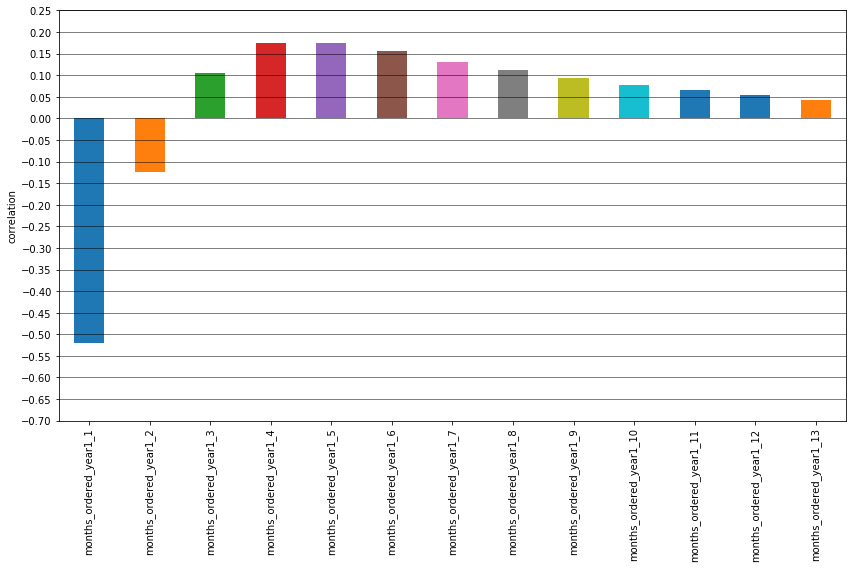

In [59]:
correl[1:].plot.bar(y='retained', legend=False, figsize=(12,8))
plt.ylim(-0.5, 0.2)
plt.yticks(np.arange(-0.7, 0.3, step=0.05))
plt.ylabel('correlation')
plt.grid(axis='y',linestyle='-', linewidth='0.5', color='black')
plt.tight_layout()
plt.savefig('retention_correl_all.png', transparent=True)